## PROBLEM STATEMENT
## **Speech Analysis on European Languages and Next Word Prediction**
* ##  FRENCH LANGUAGE

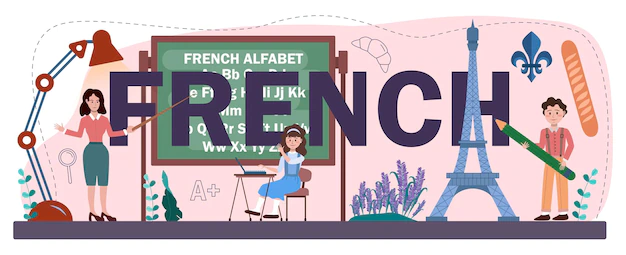

## Import libraries

In [6]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import re
import string
from nltk.corpus import stopwords
from tensorflow.keras.utils import plot_model
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

2022-10-13 22:17:47.899068: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-10-13 22:17:47.899143: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## 1. Read at least ~2000 audio files and transcripts from the data.
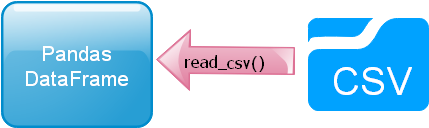

In [7]:
df = pd.read_csv('../input/french-single-speaker-speech-dataset/transcript.txt', sep='|', header=None)


In [8]:
df

,0,1,2,3
0,lesmis/lesmis_0001.wav,Chapitre I La Charybde du faubourg Saint-Antoi...,Chapitre I La Charybde du faubourg Saint-Antoi...,7.63
1,lesmis/lesmis_0002.wav,Les deux plus mémorables barricades que l'obse...,Les deux plus mémorables barricades que l'obse...,9.41
2,lesmis/lesmis_0003.wav,"Ces deux barricades, symboles toutes les deux,...","Ces deux barricades, symboles toutes les deux,...",6.27
3,lesmis/lesmis_0004.wav,sortirent de terre lors de la fatale insurrect...,sortirent de terre lors de la fatale insurrect...,9.24
4,lesmis/lesmis_0005.wav,"Il arrive quelquefois que, même contre les pri...","Il arrive quelquefois que, même contre les pri...",6.54
...,...,...,...,...
8644,lupincontresholme/lupincontresholme_3150.wav,Le ciel s’était ouvert devant la lune. Autour ...,Le ciel s’était ouvert devant la lune. Autour ...,7.37
8645,lupincontresholme/lupincontresholme_3151.wav,"Elle flottait dans l’eau, et l’immensité, où s...","Elle flottait dans l’eau, et l’immensité, où s...",6.97
8646,lupincontresholme/lupincontresholme_3152.wav,La ligne des côtes se détacha de l’horizon obs...,La ligne des côtes se détacha de l’horizon obs...,7.69
8647,lupincontresholme/lupincontresholme_3153.wav,M. Austin Gilett passa en compagnie de deux in...,Monsieur Austin Gilett passa en compagnie de d...,9.72


In [9]:
df=df.iloc[:,:2]

In [10]:
df

,0,1
0,lesmis/lesmis_0001.wav,Chapitre I La Charybde du faubourg Saint-Antoi...
1,lesmis/lesmis_0002.wav,Les deux plus mémorables barricades que l'obse...
2,lesmis/lesmis_0003.wav,"Ces deux barricades, symboles toutes les deux,..."
3,lesmis/lesmis_0004.wav,sortirent de terre lors de la fatale insurrect...
4,lesmis/lesmis_0005.wav,"Il arrive quelquefois que, même contre les pri..."
...,...,...
8644,lupincontresholme/lupincontresholme_3150.wav,Le ciel s’était ouvert devant la lune. Autour ...
8645,lupincontresholme/lupincontresholme_3151.wav,"Elle flottait dans l’eau, et l’immensité, où s..."
8646,lupincontresholme/lupincontresholme_3152.wav,La ligne des côtes se détacha de l’horizon obs...
8647,lupincontresholme/lupincontresholme_3153.wav,M. Austin Gilett passa en compagnie de deux in...


In [11]:
df.columns = ['file', 'transcription']
df.head()

,file,transcription
0,lesmis/lesmis_0001.wav,Chapitre I La Charybde du faubourg Saint-Antoi...
1,lesmis/lesmis_0002.wav,Les deux plus mémorables barricades que l'obse...
2,lesmis/lesmis_0003.wav,"Ces deux barricades, symboles toutes les deux,..."
3,lesmis/lesmis_0004.wav,sortirent de terre lors de la fatale insurrect...
4,lesmis/lesmis_0005.wav,"Il arrive quelquefois que, même contre les pri..."


In [12]:
stopwords = stopwords.words('french')
punct = list(string.punctuation)
df["transcription"] = df["transcription"].apply(lambda x: re.sub('[^a-zA-Z]',' ',x))
df["transcription"] = df["transcription"].apply(lambda x: x.replace("[^A-Za-z]",""))
df['transcription'] = df['transcription'].apply(lambda x: " ".join([word for word in x.split() if word not in punct]))
df["transcription"] = df["transcription"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords and len(word)>1]))
df["transcription"] = df["transcription"].apply(lambda x: x.replace("'",""))
df["transcription"] = df["transcription"].apply(lambda x: x.lower())
df["transcription"] = df["transcription"].apply(lambda x: x.replace("\s+"," "))
df['transcription'] = "start "+df['transcription']+" end"
df.head()

,file,transcription
0,lesmis/lesmis_0001.wav,start chapitre la charybde faubourg saint anto...
1,lesmis/lesmis_0002.wav,start les deux plus morables barricades observ...
2,lesmis/lesmis_0003.wav,start ces deux barricades symboles toutes deux...
3,lesmis/lesmis_0004.wav,start sortirent terre lors fatale insurrection...
4,lesmis/lesmis_0005.wav,start il arrive quelquefois contre principes c...


In [13]:
df['file'] = '../input/french-single-speaker-speech-dataset/' + df['file']
df.head()

,file,transcription
0,../input/french-single-speaker-speech-dataset/...,start chapitre la charybde faubourg saint anto...
1,../input/french-single-speaker-speech-dataset/...,start les deux plus morables barricades observ...
2,../input/french-single-speaker-speech-dataset/...,start ces deux barricades symboles toutes deux...
3,../input/french-single-speaker-speech-dataset/...,start sortirent terre lors fatale insurrection...
4,../input/french-single-speaker-speech-dataset/...,start il arrive quelquefois contre principes c...


In [14]:
df['file'][0]

'../input/french-single-speaker-speech-dataset/lesmis/lesmis_0001.wav'

### Taking 2000 audio files

In [15]:
df.shape

(8649, 2)

In [16]:
df=df.sample(2000,random_state = 0 )

In [17]:
df.shape

(2000, 2)

## 2. Calculate the MFCC components for the selected audio files.

### Creating MFCC features

In [18]:
def create_mfcc_features(path):
    mfccs = []
    try:
        x , sr = librosa.load(path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
        mfccs = np.mean(mfccs.T,axis=0)
    except:
        print('Error reading audio')
    return mfccs

In [19]:
mfcc_features = {}
for audio_path in df['file'].values:
    path = audio_path.split('/')[-1]
    mfcc_features[path] = create_mfcc_features(audio_path)

## 3. Prepare the input data for the model such that, given any transcript, predict the next word with the help of the MFCC features

### Tokenization

In [20]:
sentences = df['transcription'].to_list()

In [21]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(caption.split()) for caption in sentences)
sequences = tokenizer.texts_to_sequences(sentences)

### Defining the inputs and outputs to model
### -Creating features for all audio files

In [22]:
def get_model_input(df):
    X_feature, X_seq, y = list(), list(), list()
    audio_files = df['file'].tolist()

    for audio_file in audio_files:
        path = audio_file.split('/')[-1]
        feature = mfcc_features[path].reshape(16, 8, 1)
        captions = df.loc[df['file']==audio_file, 'transcription'].tolist()
        for caption in captions:
            sequence = tokenizer.texts_to_sequences([caption])[0]

            for i in range(1, len(sequence)):
                in_sequence, out_sequence = sequence[:i], sequence[i]
                in_sequence = tf.keras.preprocessing.sequence.pad_sequences([in_sequence], maxlen=max_length)[0]
                out_sequence = tf.keras.utils.to_categorical([out_sequence], num_classes=vocab_size)[0]
                X_feature.append(feature)
                X_seq.append(in_sequence)
                y.append(out_sequence)

    X_feature, X_seq, y = np.array(X_feature), np.array(X_seq), np.array(y)
    return X_feature, X_seq, y

In [23]:
train, test = train_test_split(df, test_size=0.2)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

train.shape, test.shape

((1600, 2), (400, 2))

In [24]:
vocab_size

6424

In [25]:
max_length

34

In [26]:
train_feature, train_seq, train_y = get_model_input(train)
test_feature, test_seq, test_y = get_model_input(test)

train_feature.shape, train_seq.shape, train_y.shape

((19964, 16, 8, 1), (19964, 34), (19964, 6424))

In [27]:
test_feature.shape, test_seq.shape, test_y.shape

((5041, 16, 8, 1), (5041, 34), (5041, 6424))

In [29]:
train_seq = train_seq.reshape(19964,34)
train_y = train_y.reshape(19964,6424)

In [30]:
test_seq = test_seq.reshape(5041,34)
test_y = test_y.reshape(5041,6424)

In [31]:
tr = pd.DataFrame({"train_feature": list(train_feature),"train_seq":list(train_seq),"train_y":list(train_y)})


In [32]:
tr.head()

,train_feature,train_seq,train_y
0,"[[[-394.8492], [121.550934], [-1.7041631], [12...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[[[-394.8492], [121.550934], [-1.7041631], [12...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[[[-394.8492], [121.550934], [-1.7041631], [12...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[[[-394.8492], [121.550934], [-1.7041631], [12...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[[[-394.8492], [121.550934], [-1.7041631], [12...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [33]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer
from tensorflow.keras.layers import Embedding, LSTM, add, Concatenate, Reshape, concatenate, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

## 4. For MFCC, build the CNN model and for transcript build any sequence model.


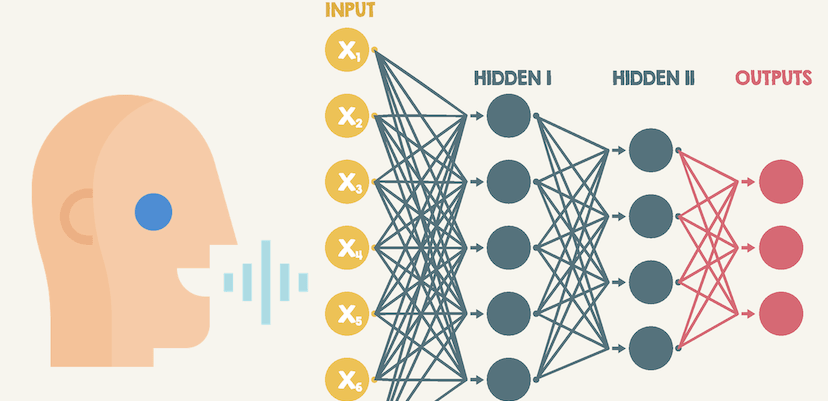

In [34]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    BATCH_SIZE = strategy.num_replicas_in_sync * 4
    print("Running on TPU:", tpu.master())
    print(f"Batch Size: {BATCH_SIZE}")
except ValueError:
    strategy = tf.distribute.get_strategy()
    BATCH_SIZE = 16
    print(f"Running on {strategy.num_replicas_in_sync} replicas")
    print(f"Batch Size: {BATCH_SIZE}")                 

2022-10-13 22:20:12.005792: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-13 22:20:12.006513: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-10-13 22:20:12.006542: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-13 22:20:12.006583: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (33ff265db876): /proc/driver/nvidia/version does not exist
2022-10-13 22:20:12.007347: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

Running on TPU: grpc://10.0.0.2:8470
Batch Size: 32


In [35]:
tf.keras.backend.clear_session()

with strategy.scope():
    input_model_1 = Input(shape=(16, 8, 1))
    feature_model = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same")(input_model_1)
    feature_model = MaxPooling2D(2, 2)(feature_model)
    feature_model = Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding = "same")(feature_model)
    feature_model = MaxPooling2D(2, 2)(feature_model)
    feature_model = Flatten()(feature_model)
    feature_model = Dense(256, activation='relu')(feature_model) ## 256 match with LSTM neuron when merging
    feature_model_reshaped = Reshape((1, 256), input_shape=(256,))(feature_model)


    # LSTM  model
    input_model_2 = Input(shape=(max_length,))
    seq_model = Embedding(vocab_size, 128, mask_zero=True)(input_model_2)
    seq_model = LSTM(256, activation='relu')(seq_model) #match here with 256
    seq_model = Dropout(0.5)(seq_model)
   # seq_model = LSTM(128, activation='relu', return_sequences=True)(seq_model)
    
    # Merging both models
    decoder = add([feature_model, seq_model])
    decoder = Dense(256, activation='relu')(decoder)
    decoder = Dropout(0.5)(decoder)
    output_model = Dense(vocab_size, activation='softmax')(decoder) #vocabsize is based on vocabulary so output is on that

    # [image, seq] [word]
    model = Model(inputs=[input_model_1, input_model_2], outputs=output_model)
    model.compile(loss='categorical_crossentropy', optimizer='adam')

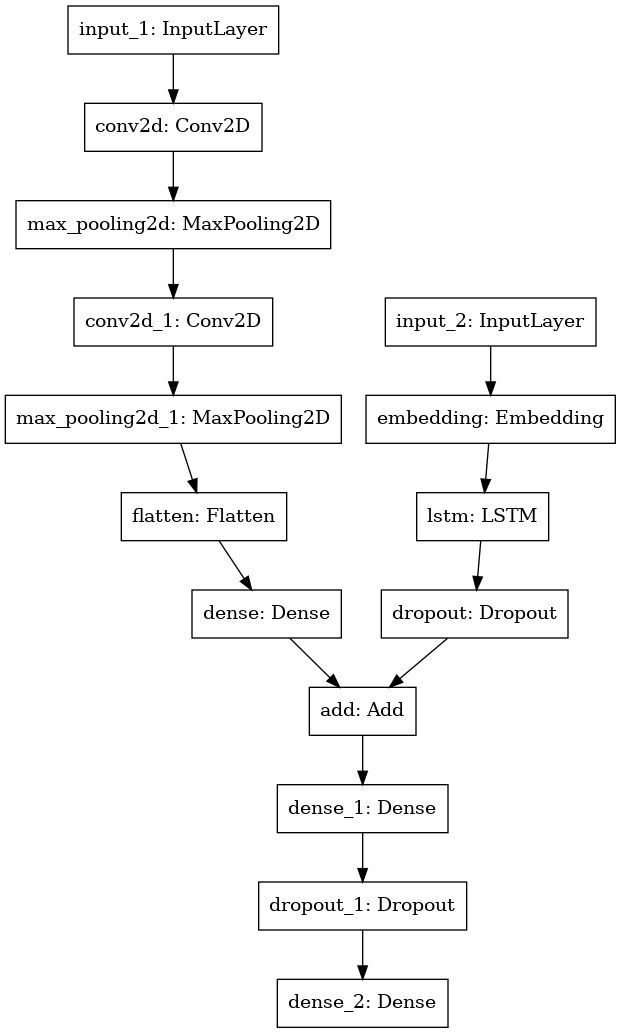

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [37]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 16, 8, 1)]   0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 16, 8, 16)    160         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 8, 4, 16)     0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 8, 4, 8)      1160        max_pooling2d[0][0]              
______________________________________________________________________________________________

In [38]:
history = model.fit((train_feature, train_seq), train_y, epochs=60,
                    validation_data=((test_feature, test_seq), test_y))

Epoch 1/60
624/624 [==============================] - 20s 19ms/step - loss: 7.9701 - val_loss: 7.6150
Epoch 2/60
624/624 [==============================] - 9s 15ms/step - loss: 7.4090 - val_loss: 7.6468
Epoch 3/60
624/624 [==============================] - 9s 15ms/step - loss: 7.2280 - val_loss: 7.7362
Epoch 4/60
624/624 [==============================] - 10s 15ms/step - loss: 7.0634 - val_loss: 7.8225
Epoch 5/60
624/624 [==============================] - 9s 15ms/step - loss: 6.9727 - val_loss: 7.9719
Epoch 6/60
624/624 [==============================] - 9s 15ms/step - loss: 6.8581 - val_loss: 8.0983
Epoch 7/60
624/624 [==============================] - 10s 16ms/step - loss: 6.6863 - val_loss: 8.3047
Epoch 8/60
624/624 [==============================] - 10s 15ms/step - loss: 6.5652 - val_loss: 8.4281
Epoch 9/60
624/624 [==============================] - 10s 16ms/step - loss: 6.4442 - val_loss: 8.6710
Epoch 10/60
624/624 [==============================] - 10s 15ms/step - loss: 6.2945 - 

## 5. Prepare the preprocessing pipeline to predict the transcript for any raw audio files. Evaluate the model for at least 10-12 audio files.

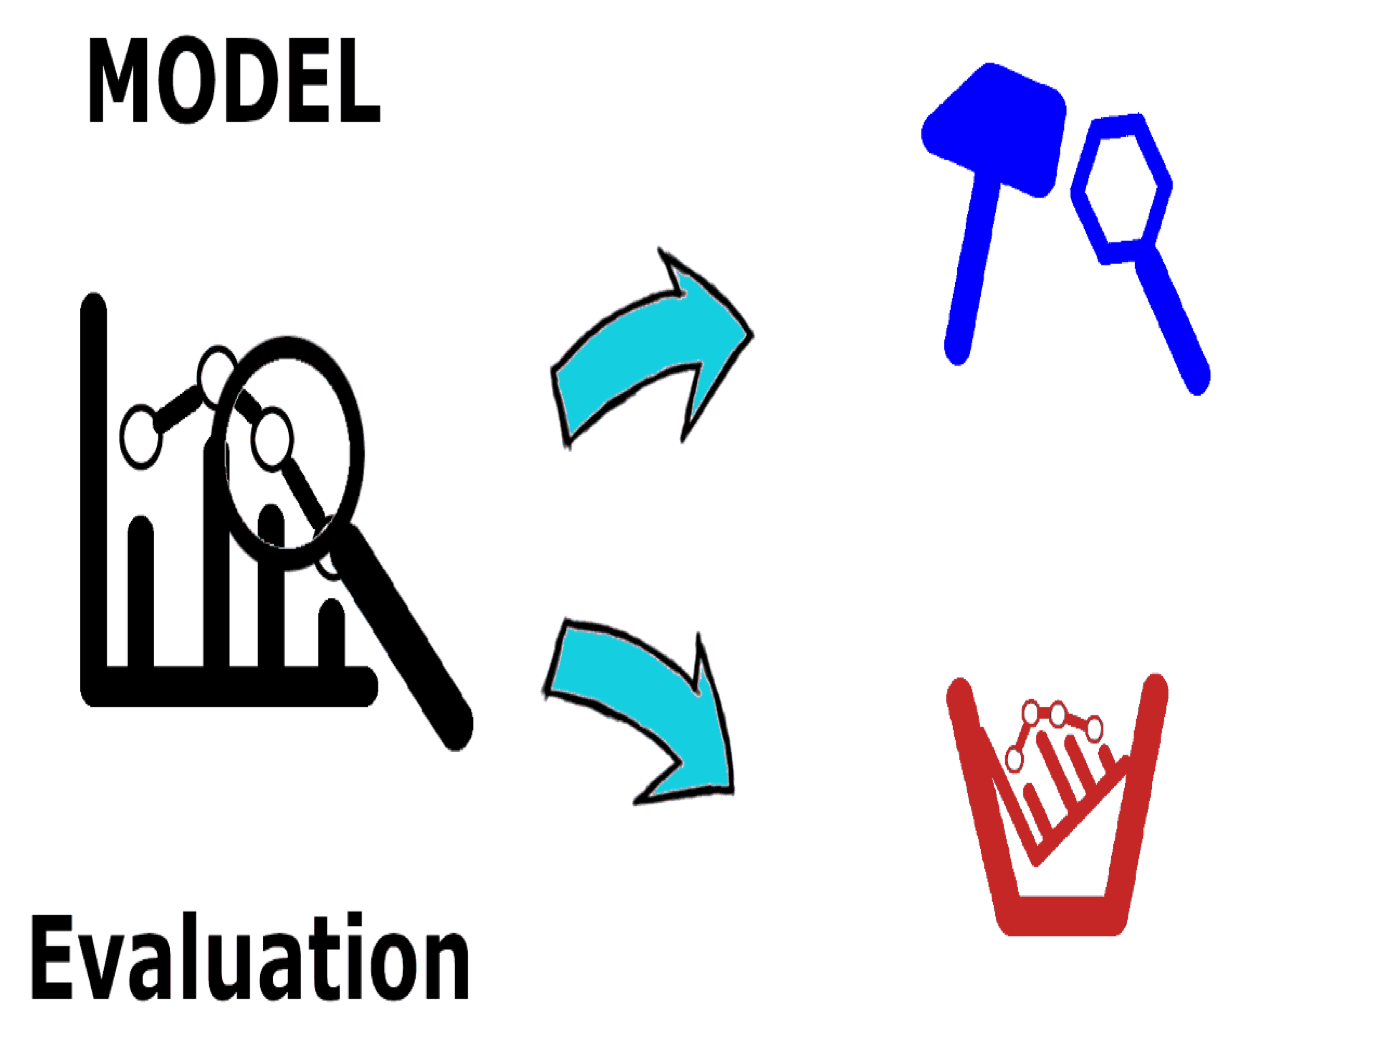

In [50]:
def inverse_tokenizer(index):
    for word, i in tokenizer.word_index.items():
        if i==index:
            return word
    return None

In [81]:
def evaluate_speech_to_text(audio_path):
    path = audio_path.split('/')[-1]
    feature = mfcc_features[path].reshape(-1, 16, 8, 1)
    pred_text = "start"
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([pred_text])[0]
        sequence = tf.keras.preprocessing.sequence.pad_sequences([sequence], max_length)

        y_pred = model.predict([feature,sequence])
        y_pred = np.argmax(y_pred)
        word = inverse_tokenizer(y_pred)
        if word is None:
            break
        pred_text+= " " + word
        if word == 'end':
            break
    return pred_text
    
  

### Evaluating the Training set

In [82]:
sample_df = train.sample(12)
files = sample_df['file'].tolist()
actual_transcription = sample_df['transcription'].tolist()
pred_transcription = []
for file in files:
    transcription = evaluate_speech_to_text(file)
    pred_transcription.append(transcription)

### Training Set Outcomes: Actual vs Predicted

In [86]:
for i in range(0,12):
    print(f"\033[1m Actual {i+1} \033[0m: ", actual_transcription[i] )
    print(f"\033[1m Predicted {i+1} \033[0m:" , pred_transcription[i])
    print("\n")

 Actual 1 :  start trop boutons rose ouverts trop rossignols chantants trop feuilles vertes trop aurore vie peut trop aimer end
 Predicted 1 : start trop boutons rose ouverts trop rossignols chantants trop feuilles vertes trop aurore vie peut trop aimer end


 Actual 2 :  start ars ne lupin gentilhomme cambrioleur cette petite plaisanterie parut causer vive satisfaction end
 Predicted 2 : start bout quarante minutes appeler spectacles ars lupin minemment comique police end


 Actual 3 :  start son esprit tait bourrel conjectures end
 Predicted 3 : start le fils tonation roula cho cho crypte comme neau sans avoir aper table augias end


 Actual 4 :  start deux hommes pass rent devant sholm dit lupin voix dont timbre semblait rement alt end
 Predicted 4 : start fit dit devant devant sholm voix devant devant aller plus timbre timbre semblait oreille passif end


 Actual 5 :  start mademoiselle air bien sinc re mais oui implora faut avoir confiance end
 Predicted 5 : start mais sholm wilso

### Evaluating the Test set

In [87]:
test_sample_df = test.sample(12)
files = test_sample_df['file'].tolist()
test_actual_transcription = test_sample_df['transcription'].tolist()
test_pred_transcription = []
for file in files:
    transcription = evaluate_speech_to_text(file)
    test_pred_transcription.append(transcription)

### Test Set Outcomes: Actual vs Predicted

In [88]:
for i in range(0,12):
    print(f"\033[1m Actual {i+1} \033[0m: ",test_sample_df['transcription'].tolist()[i] )
    print(f"\033[1m Predicted {i+1} \033[0m: " , test_pred_transcription[i])
    print("\n")
        

 Actual 1 :  start tu vois dos faut sorte clef donne end
 Predicted 1 :  start il touffa cri stup faction cette fois caprice choses prends telle rocit end


 Actual 2 :  start cosette tait lumi re la lumi re besoin tre claircie il tout pouvait sirer end
 Predicted 2 :  start il dames grande entendu propre vie fatalement end


 Actual 3 :  start seigneur dieu murmura voil encore vilain tour et ajouta anxieusement et bagages end
 Predicted 3 :  start il laissa droite deux couloirs ramifient forme griffe sous rue laffitte end


 Actual 4 :  start retenu rocher adoss sophisme tra poussi re tant renversant conscience sous tant renvers end
 Predicted 4 :  start combien fois cet ingrat oublieux end


 Actual 5 :  start il semble plaindre mais dame blonde trouvez end
 Predicted 5 :  start sortie fran ais jondrette autres bandits utilit vice ivrognerie sauv end


 Actual 6 :  start il vrai comblait madrigaux cadeaux end
 Predicted 6 :  start je vais dire bien soin marius mari javert balbutiait 

## 6. Publish your work in the Kaggle.
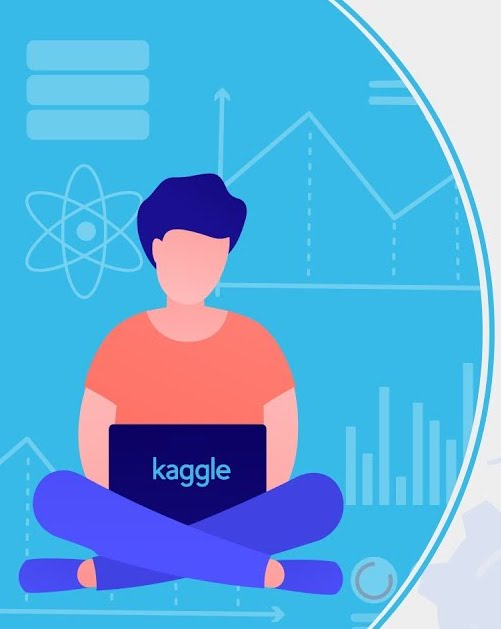
## PUBLISHED.